    Descriptive Statistics and Tests 

In [3]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")


In [35]:
df1 = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\airline_passengers.csv', index_col= 'Month', parse_dates=True)
df1.index.freq = 'MS'

In [6]:
df1.head(3)

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


In [7]:
df2 = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\DailyTotalFemaleBirths.csv', index_col='Date', parse_dates=True)

In [8]:
df2.head(3)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30


In [9]:
from statsmodels.tsa.stattools import adfuller,kpss,coint,bds,q_stat,grangercausalitytests,levinson_durbin

In [10]:
print('Augmented Dickey-Fuller Test on Airline Data')
dftest = adfuller(df1['Thousands of Passengers'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Airline Data


(0.8153688792060597,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [11]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [12]:
adf_test(df1['Thousands of Passengers'], title = 'Airline Passeneger Data')

Augmented Dickey-Fuller Test: Airline Passeneger Data
ADF test statistic        0.815369
p-value                   0.991880
# lags used              13.000000
# observations          130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [13]:
adf_test(df2['Births'], title = 'Female Birth')

Augmented Dickey-Fuller Test: Female Birth
ADF test statistic       -4.808291
p-value                   0.000052
# lags used               6.000000
# observations          358.000000
critical value (1%)      -3.448749
critical value (5%)      -2.869647
critical value (10%)     -2.571089
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [14]:
df3 = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\Alcohol_Sales.csv', index_col='DATE', parse_dates=True)

In [15]:
df3.head(3)

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-01-02,3458
1992-01-03,4002


In [16]:
df3 = df3.rename({'S4248SM144NCEN': 'Sales'}, axis=1)

In [17]:
df3

,Sales
DATE,
1992-01-01,3459
1992-01-02,3458
1992-01-03,4002
1992-01-04,4564
1992-01-05,4221
...,...
2018-01-09,12396
2018-01-10,13914
2018-01-11,14174


In [18]:
adf_test(df3['Sales'])

Augmented Dickey-Fuller Test: 
ADF test statistic        2.037405
p-value                   0.998720
# lags used              14.000000
# observations          310.000000
critical value (1%)      -3.451622
critical value (5%)      -2.870909
critical value (10%)     -2.571762
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


<Axes: xlabel='DATE'>

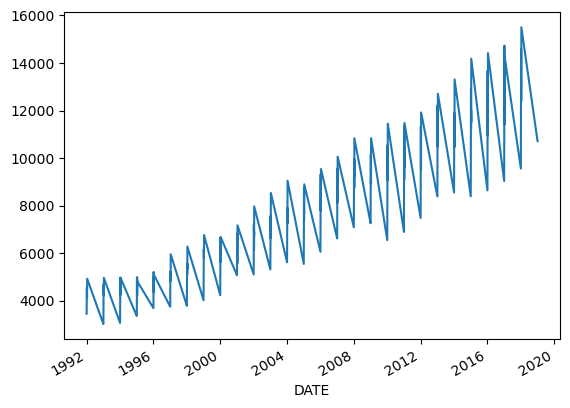

In [19]:
df3['Sales'].plot()

In [20]:
Sample = pd.read_csv('D:\\karan data\\Data for Preprocessing\\Forecasting Data\\samples.csv', index_col= 'Unnamed: 0', parse_dates=True)

In [21]:
Sample

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


<Axes: >

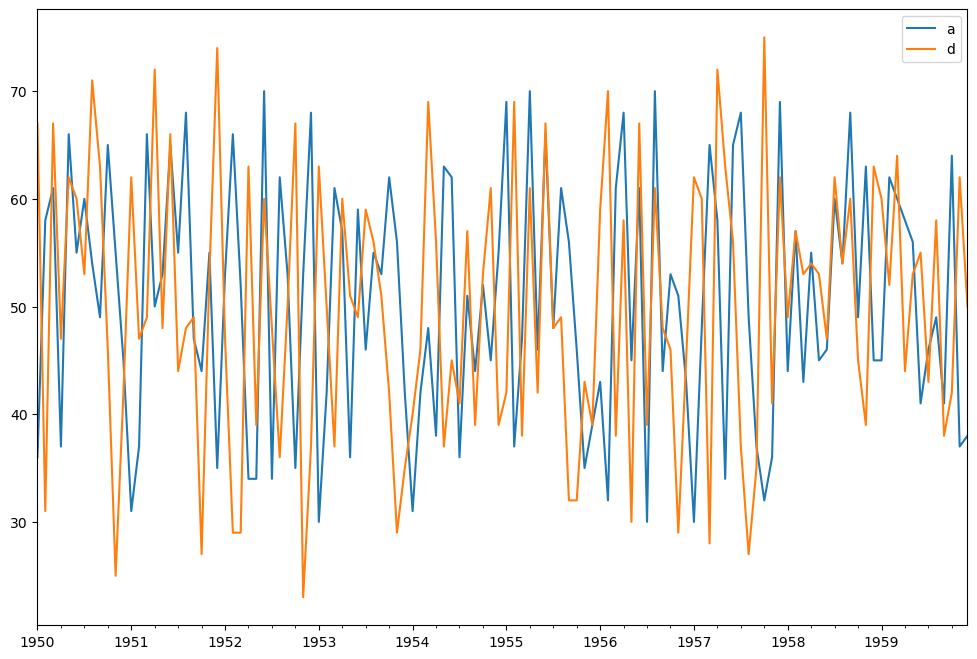

In [22]:
Sample[['a', 'd']].plot(figsize = (12,8))

In [23]:
grangercausalitytests(Sample[['a','d']],maxlag=2);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.7492  , p=0.1860  , df=1
likelihood ratio test: chi2=1.7365  , p=0.1876  , df=1
parameter F test:         F=1.7051  , p=0.1942  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=597.3806, p=0.0000  , df=2
likelihood ratio test: chi2=212.6514, p=0.0000  , df=2
parameter F test:         F=286.0339, p=0.0000  , df_denom=113, df_num=2


In [24]:
grangercausalitytests(Sample[['a','c']],maxlag=2);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1292  , p=0.7199  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=0.1325  , p=0.7158  , df=1
likelihood ratio test: chi2=0.1325  , p=0.7159  , df=1
parameter F test:         F=0.1292  , p=0.7199  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.8111  , p=0.4469  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=1.6940  , p=0.4287  , df=2
likelihood ratio test: chi2=1.6820  , p=0.4313  , df=2
parameter F test:         F=0.8111  , p=0.4469  , df_denom=113, df_num=2


In [25]:
df3['a'].iloc[2:].plot(figsize=(16,5),legend=True);
df3['d'].shift(2).plot(legend=True);

KeyError: 'a'

<Axes: >

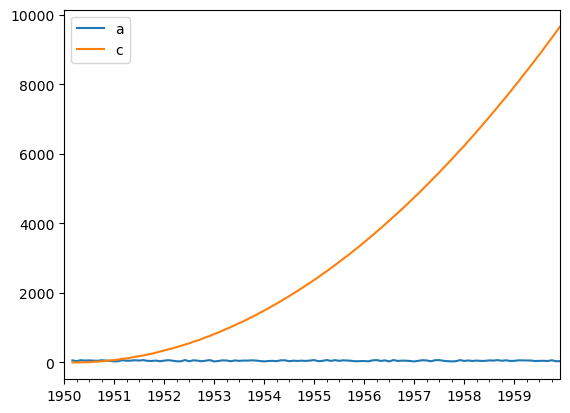

In [ ]:
Sample['a'].iloc[2:].plot(legend = True)
Sample['c'].shift(2).plot(legend=True)

<Axes: >

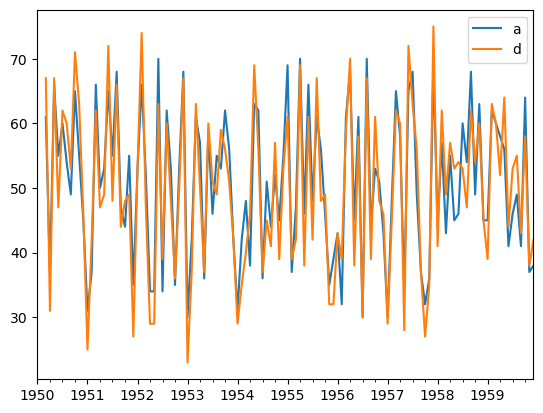

In [ ]:
Sample['a'].iloc[2:].plot(legend = True)
Sample['d'].shift(2).plot(legend=True)

In [ ]:
grangercausalitytests(Sample[['a','b']],maxlag=20);


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1
ssr based chi2 test:   chi2=1.9140  , p=0.1665  , df=1
likelihood ratio test: chi2=1.8988  , p=0.1682  , df=1
parameter F test:         F=1.8657  , p=0.1746  , df_denom=116, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2
ssr based chi2 test:   chi2=4.1192  , p=0.1275  , df=2
likelihood ratio test: chi2=4.0489  , p=0.1321  , df=2
parameter F test:         F=1.9723  , p=0.1439  , df_denom=113, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3
ssr based chi2 test:   chi2=3.7580  , p=0.2888  , df=3
likelihood ratio test: chi2=3.6989  , p=0.2959  , df=3
parameter F test:         F=1.1777  , p=0.3216  , df_denom=110, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.1769  , p=0.3252  

<Axes: >

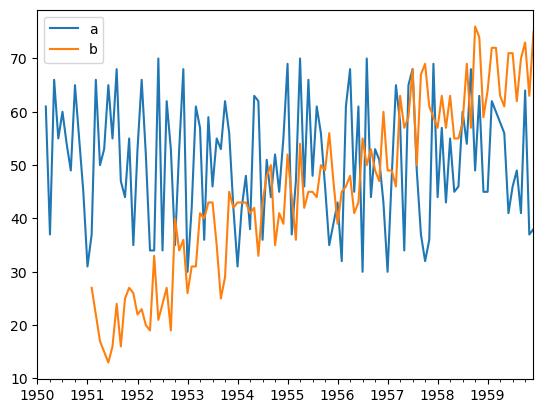

In [ ]:
Sample['a'].iloc[2:].plot(legend = True)
Sample['b'].shift(13).plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import mse, rmse, meanabs


In [ ]:
np.random.seed(42)
df = pd.DataFrame(np.random.randint(20,30,(50,2)),columns=['test','predictions'])
df.plot(figsize=(12,4));

In [31]:
df = pd.DataFrame(np.random.randint(20,30,(50,2)), columns = ['test', 'predictions'])

<Axes: >

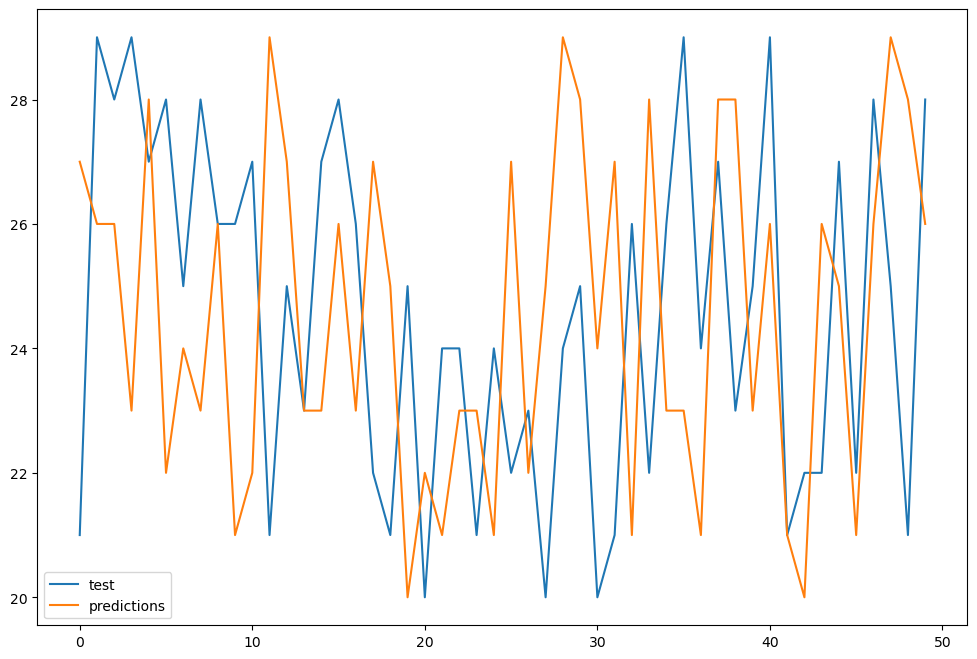

In [32]:
df.plot(figsize = (12,8))

In [33]:
MSE = mse(df['test'],df['predictions'])
RMSE = rmse(df['test'],df['predictions'])
MAE = meanabs(df['test'],df['predictions'])

print(f'Model  MSE: {MSE:.3f}')
print(f'Model RMSE: {RMSE:.3f}')
print(f'Model  MAE: {MAE:.3f}')

Model  MSE: 15.540
Model RMSE: 3.942
Model  MAE: 3.420


In [34]:
df1

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [36]:
from statsmodels.graphics.tsaplots import month_plot,quarter_plot

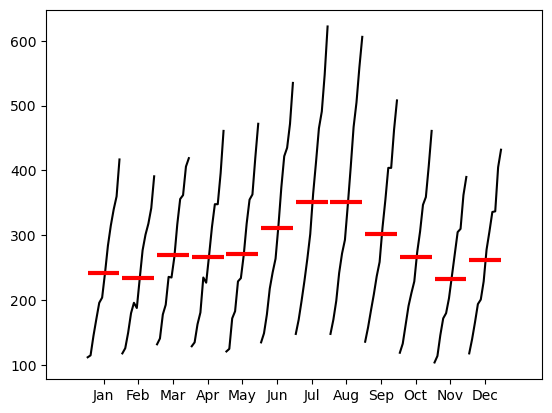

In [38]:
month_plot(df1['Thousands of Passengers']);

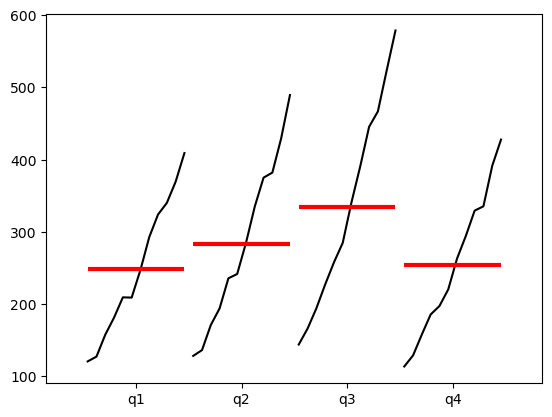

In [39]:
dfq = df1['Thousands of Passengers'].resample(rule='Q').mean()

quarter_plot(dfq);